# ANZ Virtual Internship
November 23rd 2020, NYC

## EDA

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

#### Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.
Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data.   
For example -- what is the average transaction amount?   
How many transactions do customers make each month, on average?  

Segment the dataset by transaction date and time.   
Visualise transaction volume and spending over the course of an average day or week.   
Consider the effect of any outliers that may distort your analysis.  

For a challenge – what insights can you draw from the location information provided in the dataset?

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Exploratory data analysis

In [3]:
df.shape

(12043, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
"""
A function to find columns where there is more than 50% of data missing. 
We will compare the number of available data to all rows in the column to find the percentage of missing data. 
We'll return a list of column names where available data is lower than 50%.
"""
def missingvalues(df):
    missing_values = []
    for column in df:
        notnull = sum(df[column].notnull())
        l = len(df)
        available_data = notnull/l*100
        if available_data < 50: 
            missing_values.append(column)
    return missing_values

In [6]:
cols_miss = missingvalues(df)
# Columns missing more than 50% of data
print(cols_miss)

['bpay_biller_code', 'merchant_code']


In [7]:
# bpay_biller_code actual available data is only 2 single records
df['bpay_biller_code'].value_counts()

0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64

In [8]:
# merchant_code does not have any available data
df['merchant_code'].unique()

array([nan,  0.])

In [9]:
# Delete found columns
df = df.drop(cols_miss, axis=1)

### Check for low variance

In [10]:
"""
A function to find low variance data. 
Checks if the most recurrent value of the feature is repeated in almost all instances. 
x is percentage of uniform values. 
Return a list of column names where data is same for x%. 
"""
def low_variance(df, x):
    low_var = []
    for i in df.columns:
        counts = df[i].value_counts()
        top = counts.iloc[0]
        if top / len(df) * 100 > x:
            low_var.append(i)
    return low_var

In [11]:
# columns where 90% of data is the same
cols_low = low_variance(df, 90)
print(cols_low)

['currency', 'country', 'movement']


In [12]:
# Only currency is AUD
df['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

In [13]:
# Only country is Australia
df['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [14]:
# 92.7% of transactions are paid with debit
df['movement'].value_counts(normalize=True)*100

debit     92.66794
credit     7.33206
Name: movement, dtype: float64

## Date and time

In [15]:
from datetime import datetime

In [16]:
# drop column 'date' which is same as column 'extraction' with time
df.drop('date', axis=1, inplace=True)

In [17]:
# remove characters after seconds
df['extraction'] = df['extraction'].str.split('.').str[0]

In [18]:
df['extraction'][0]

'2018-08-01T01:01:15'

In [19]:
# convert string to datetime
df['extraction'] = pd.to_datetime(df['extraction'], format='%Y-%m-%dT%H:%M:%S')
print('date_object =', df['extraction'][0])
print('type of date_object =', type(df['extraction'][0]))

date_object = 2018-08-01 01:01:15
type of date_object = <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
# Add columns date, month, day, time, hour and rename 'extraction' to 'datetime'
df['date'] = df['extraction'].dt.date
df['month'] = df['extraction'].dt.month
df['weekday'] = df['extraction'].dt.weekday
df['day'] = df['extraction'].dt.day
df['time'] = df['extraction'].dt.time
df['hour'] = df['extraction'].dt.hour
df.rename(columns = {'extraction':'datetime'}, inplace = True)

In [21]:
# Check how many dates we have
df['date'].nunique()

91

In [22]:
(df['date'].max()-df['date'].min()).days+1 # plus to count for the last day

92

In [23]:
df[df['month']==8]['date'].nunique()

30

In [24]:
# August 16 is missing
df[df['month']==8]['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

# Longitude and latitude

In [27]:
df[['long_lat', 'merchant_long_lat']].head(2)

,long_lat,merchant_long_lat
0,153.41 -27.95,153.38 -27.99
1,153.41 -27.95,151.21 -33.87


In [42]:
# separate customer 'long_lat' column to longitude and latitude
df['c_long'] = df['long_lat'].str.split(' ').str[0].astype(float)
df['c_lat'] = df['long_lat'].str.split(' ').str[1].astype(float)
df[['long_lat', 'c_long', 'c_lat']]

,long_lat,c_long,c_lat
0,153.41 -27.95,153.41,-27.95
1,153.41 -27.95,153.41,-27.95
2,151.23 -33.94,151.23,-33.94
3,153.10 -27.66,153.10,-27.66
4,153.41 -27.95,153.41,-27.95
...,...,...,...
12038,149.83 -29.47,149.83,-29.47
12039,151.22 -33.87,151.22,-33.87
12040,151.12 -33.89,151.12,-33.89
12041,144.96 -37.76,144.96,-37.76


In [62]:
df.drop('long_lat', axis=1, inplace=True)

In [63]:
# latitude between -90 to 90 
# longitude between -180 to 180
df[['c_long', 'c_lat']].min()

c_long    114.62
c_lat    -573.00
dtype: float64

In [64]:
df[(df['c_lat']>90) | (df['c_lat']<-90)].groupby('customer_id').mean()

,card_present_flag,balance,age,amount,month,weekday,day,hour,c_long,c_lat
customer_id,,,,,,,,,,
CUS-1617121891,0.797468,5764.260163,22.0,268.989837,8.829268,3.04065,12.455285,14.227642,255.0,-573.0


In [72]:
# remove customer with wrong location values
df = df[df['customer_id']!='CUS-1617121891']

# Output cleaned data set

In [78]:
df.to_excel('clean_anz.xlsx', index=False)
print('File saved!')

File saved!


In [79]:
df = pd.read_excel('clean_anz.xlsx')
df.head(2)

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,merchant_long_lat,movement,date,month,weekday,day,time,hour,c_long,c_lat
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,26,...,153.38 -27.99,debit,2018-08-01,8,2,1,01:01:15,1,153.41,-27.95
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,26,...,151.21 -33.87,debit,2018-08-01,8,2,1,01:13:45,1,153.41,-27.95


### Rest of missing values

In [80]:
# Number of NaN values
# merchant_state, merchant_suburb, card_present_flag, merchant_long_lat, merchant_id

null_values = df.isnull().sum().sort_values(ascending=False).head(8)
print(null_values)

card_present_flag    4282
merchant_id          4282
merchant_long_lat    4282
merchant_suburb      4282
merchant_state       4282
c_lat                   0
datetime                0
account                 0
dtype: int64


In [81]:
df[df['merchant_state'].isnull()].head(2)

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,merchant_long_lat,movement,date,month,weekday,day,time,hour,c_long,c_lat
5,posted,NaN,ACC-1608363396,AUD,PAYMENT,NaN,Robert,1705.43,M,20,...,NaN,debit,2018-08-01,8,2,1,02:00:00,2,151.22,-33.87
9,posted,NaN,ACC-602667573,AUD,INTER BANK,NaN,Michael,466.58,M,40,...,NaN,debit,2018-08-01,8,2,1,06:00:00,6,151.23,-33.96


In [82]:
# The same records have missing values
df[['merchant_state', 'merchant_suburb', 'card_present_flag', 'merchant_long_lat', 'merchant_id']][df['merchant_state'].isnull()]

,merchant_state,merchant_suburb,card_present_flag,merchant_long_lat,merchant_id
5,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
11904,NaN,NaN,NaN,NaN,NaN
11909,NaN,NaN,NaN,NaN,NaN
11912,NaN,NaN,NaN,NaN,NaN
11913,NaN,NaN,NaN,NaN,NaN


In [83]:
# 'POS', 'SALES-POS' left out
df[(df['status']=='posted') & (df['merchant_id'].isnull())]['txn_description'].unique()

array(['PAYMENT', 'INTER BANK', 'PAY/SALARY', 'PHONE BANK'], dtype=object)

In [84]:
# Records where 'status' is marked as 'posted' has missing values for the merchant
df[df['merchant_state'].isnull()]['status'].value_counts()

posted    4282
Name: status, dtype: int64

In [85]:
df['status'].value_counts()

authorized    7638
posted        4282
Name: status, dtype: int64

## Overall insights about the data

In [86]:
# each transaction_id has 1 customer_id and 1 account
# account and customer_id have 100 values
df['account'].value_counts()
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 99, dtype: int64

In [87]:
# 75% of customers are between age 18 and 38, median age 28
df['age'].describe()

count    11920.000000
mean        30.670889
std         10.059951
min         18.000000
25%         23.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

<AxesSubplot:>

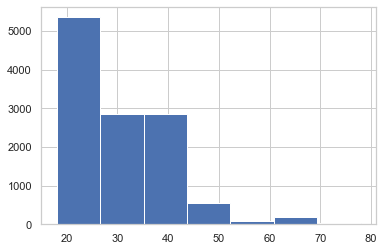

In [88]:
df['age'].hist(bins=7)

#### Average salary for male and female

In [89]:
df_salary = df[df['txn_description']=='PAY/SALARY']

In [90]:
# Male average salary
df_salary[df_salary['gender']=='M']['amount'].mean()

2077.9414223194726

In [91]:
# Female average salary
df_salary[df_salary['gender']=='F']['amount'].mean()

1679.3704773269665

Text(0.5, 0, 'Gender')

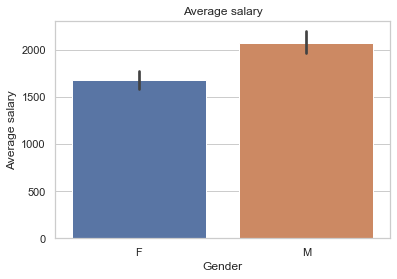

In [92]:
g = sns.barplot(x='gender', y=df_salary['amount'], data=df)
g.set_title('Average salary')
g.set_ylabel('Average salary')
g.set_xlabel('Gender')

### Transaction volume and amount

#### Separate purchase transactions

In [93]:
# 'POS' + 'SALES-POS' VS rest of transactions
df = df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')] 
# df[df['merchant_id'].notnull()] same outcome

#### By month

In [96]:
# Average transaction amount
df['amount'].mean()

39.79169808850489

In [97]:
# Average transaction amount for each month
df.groupby('month')['amount'].mean()

month
8     35.455024
9     42.527246
10    41.287840
Name: amount, dtype: float64

In [102]:
# How many transactions do customers make each month?
df.groupby('month')['transaction_id'].count()

month
8     2504
9     2564
10    2570
Name: transaction_id, dtype: int64

In [124]:
# How many transactions do all customers make on an average month?
df.groupby('month')['transaction_id'].count().mean()

2546.0

In [104]:
# On average, How many transactions per customer on average month?
#  (no. of avg transactions per month) / (number of customers)
df.groupby(['customer_id', 'month'])['transaction_id'].count().mean()

27.085106382978722

#### By week

In [98]:
avg_volume_week = df.groupby('weekday')['transaction_id'].count()
avg_amount_week = df.groupby('weekday')['amount'].mean()

In [120]:
# plt.figure(figsize=(12,6))
# plt.xticks(np.arange(0, 24, step=2))
# plt.ylabel('Avg. volume')
# plt.xticks(np.arange(0, 7, 1))
# positions = [0, 1, 2, 3, 4, 5, 6]
# labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plt.xticks(positions, labels)
# plt.plot(avg_volume_week);

In [ ]:
# plt.figure(figsize=(12,6))
# plt.xticks(np.arange(0, 24, step=2))
# plt.ylabel('Avg. amount')
# plt.xticks(np.arange(0, 7, 1))
# positions = [0, 1, 2, 3, 4, 5, 6]
# labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plt.xticks(positions, labels)
# plt.plot(avg_amount_week);

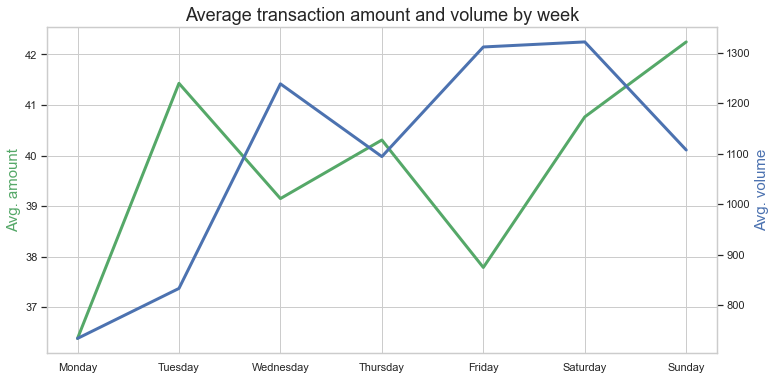

In [122]:
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0, 7, 1))
positions = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(positions, labels)
# plt.grid(False)

plt.ylabel('Avg. amount', color='g', fontsize=15)
plt.plot(avg_amount_week, color='g', lw=3)

ax2 = plt.twinx()
ax2.grid(False)
plt.ylabel('Avg. volume', color='b', fontsize=15)
plt.plot(avg_volume_week, color='b', lw=3);
plt.title('Average transaction amount and volume by week', fontsize=18);

#### By hour

In [108]:
avg_volume_h = df.groupby('hour')['transaction_id'].count()
avg_amount_h = df.groupby('hour')['amount'].mean()

In [119]:
# plt.figure(figsize=(12,6))
# plt.xticks(np.arange(0, 24, step=1))
# plt.xlabel('Hour')
# plt.ylabel('Avg. volume')
# plt.plot(avg_volume_h);

In [ ]:
# plt.figure(figsize=(12,6))
# plt.xticks(np.arange(0, 24, step=1))
# plt.xlabel('Hour')
# plt.ylabel('Avg. amount')
# plt.plot(avg_amount_h);

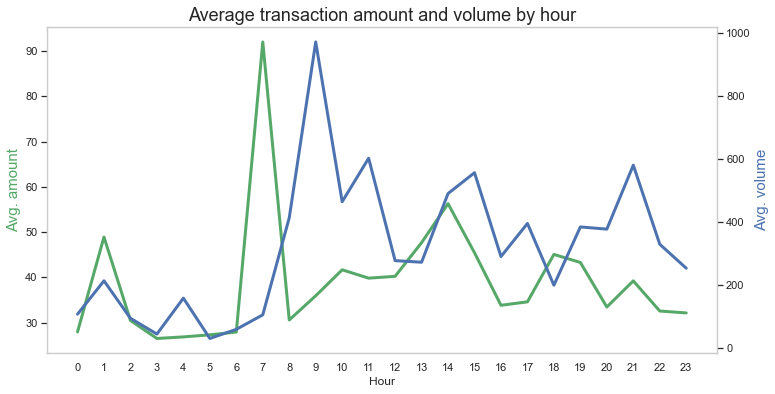

In [118]:
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0, 24, step=1))
plt.grid(False)
plt.xlabel('Hour', )
plt.ylabel('Avg. amount', color='g', fontsize=15)
plt.plot(avg_amount_h, color='g', lw=3)
ax2 = plt.twinx()
ax2.grid(False)
plt.ylabel('Avg. volume', color='b', fontsize=15)
plt.title('Average transaction amount and volume by hour', fontsize=18)
plt.plot(avg_volume_h, color='b', lw=3);